In [5]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/amit/scikit_learn_data


In [13]:
type(oliv), oliv.data.shape, oliv.images.shape, oliv.target.shape, oliv.keys()

(sklearn.utils._bunch.Bunch,
 (400, 4096),
 (400, 64, 64),
 (400,),
 dict_keys(['data', 'images', 'target', 'DESCR']))

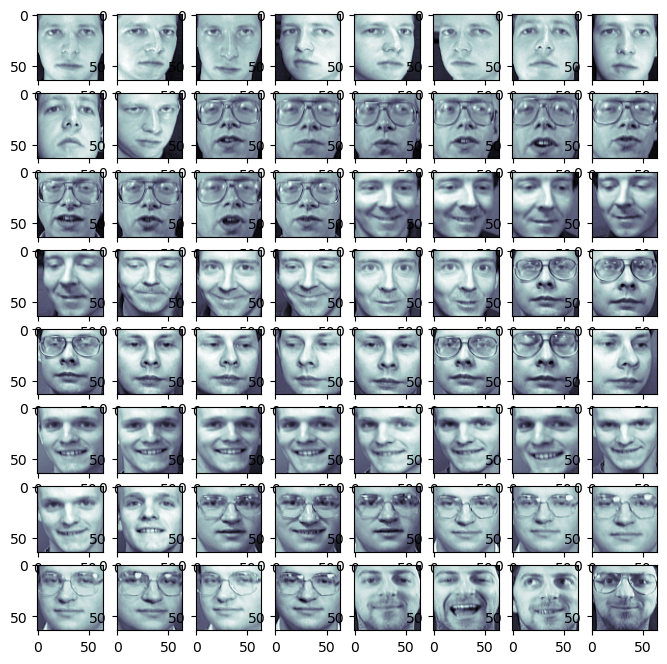

In [20]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [26]:
x = oliv.data
y = oliv.target
pca = PCA()
pca.fit_transform(x)


array([[-6.43261290e+00, -7.03665674e-01, -1.43001854e+00, ...,
         2.65650395e-02,  9.41775646e-03,  9.86829673e-06],
       [-1.07590246e+00, -6.69732809e+00,  1.84280550e+00, ...,
        -3.92862567e-04, -1.04048485e-02,  9.86881150e-06],
       [-5.29295349e+00, -1.54250574e+00,  2.25956857e-01, ...,
        -2.43329722e-02, -7.93754030e-03,  9.86873329e-06],
       ...,
       [ 2.04076338e+00, -1.50961220e+00,  3.44872832e+00, ...,
         2.14021709e-02, -3.70910438e-03,  9.86798750e-06],
       [-5.16522646e+00,  8.09676552e+00, -6.71010435e-01, ...,
        -8.22267402e-03,  1.63090993e-02,  9.86813484e-06],
       [-1.15049982e+00,  2.43503499e+00,  1.18949282e+00, ...,
         1.11257592e-02,  2.78044455e-02,  9.86843042e-06]], dtype=float32)

In [28]:
pca.components_.shape

(400, 4096)

In [30]:
k=0
temp = 0
total = sum(pca.explained_variance_)
while temp/total < 0.99 :
    temp += pca.explained_variance_[k]
    k = k +1
k

260

In [35]:
pca = PCA(n_components= k , whiten= True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 260)

Can we Get Back to Our Original Images?

In [37]:
x_inv = pca.inverse_transform(transformed_data)
x_inv.shape

(400, 4096)

In [43]:
x_inv = x_inv.reshape((400,64,64))
x_inv.shape

(400, 64, 64)

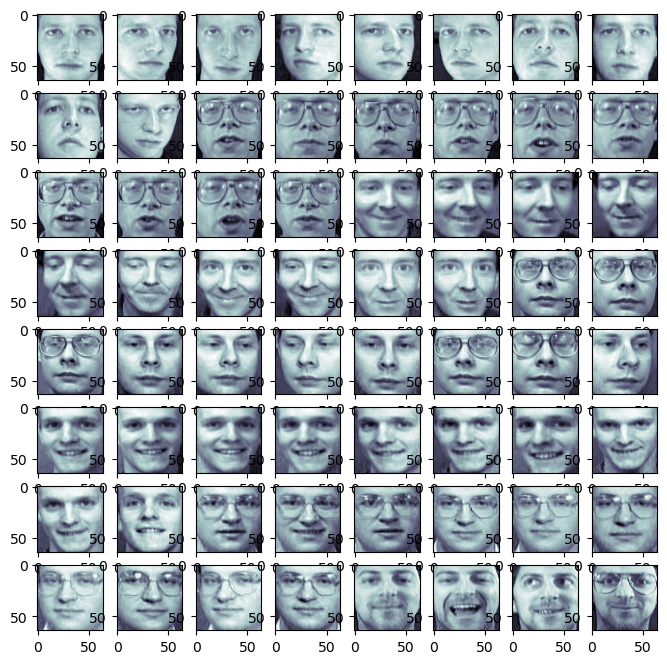

In [44]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_inv[i], cmap = plt.cm.bone)
plt.show()

EigenFaces

In [46]:
eigen_faces = pca.components_
eigen_faces.shape

(260, 4096)

In [48]:
eigen_faces = eigen_faces.reshape((260,64,64))

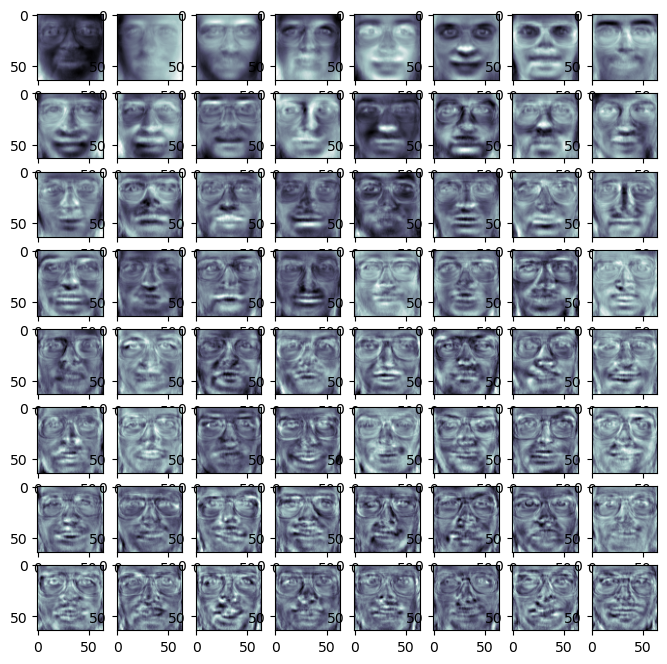

In [50]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)
plt.show()

LFW Dataset

In [67]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [53]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [57]:
lfw.keys(), lfw.data.shape, lfw.images.shape, lfw.target.shape, lfw.target_names

(dict_keys(['data', 'images', 'target', 'target_names', 'DESCR']),
 (1140, 1850),
 (1140, 50, 37),
 (1140,),
 array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Tony Blair'], dtype='<U17'))

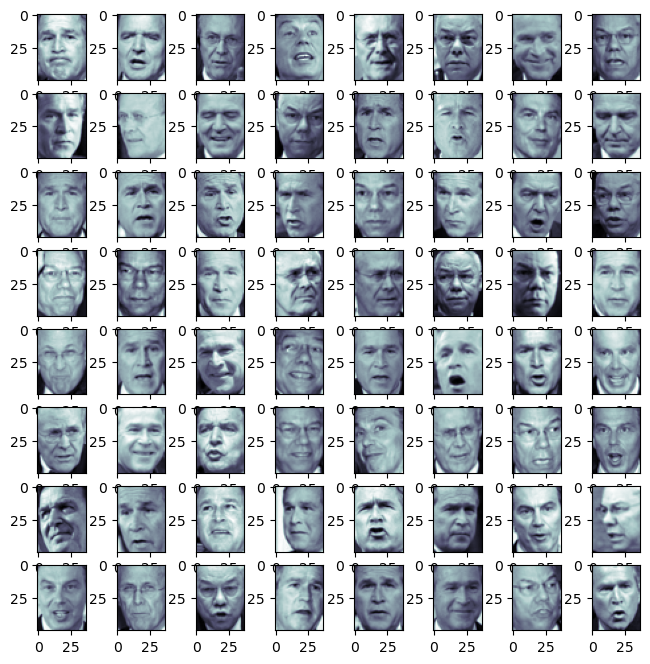

In [60]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax= fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i], cmap= plt.cm.bone)
plt.show()

In [69]:
x= lfw.data
y= lfw.target
x_train, x_test,y_train, y_test = train_test_split(x, y, random_state= 0 )
pca = PCA()
pca.fit_transform(x_train)


array([[-3.4684827e+00, -6.7016619e-01, -7.6401126e-01, ...,
        -1.3589143e-03,  4.7799628e-03,  7.3962542e-06],
       [-1.5409682e+00, -1.3510164e+00,  3.1417927e-01, ...,
        -1.0398831e-03, -4.0014330e-03,  7.3953802e-06],
       [-5.0916672e+00, -3.5604768e+00, -1.2337172e+00, ...,
        -5.3044548e-03,  1.7993845e-04,  7.3939309e-06],
       ...,
       [ 9.9989486e-01, -2.3672135e+00, -2.2077525e+00, ...,
         6.0273623e-03, -1.6280885e-03,  7.3941610e-06],
       [-2.4541724e+00,  4.7296886e+00,  1.4915573e-02, ...,
         2.5130459e-03, -9.3046045e-03,  7.3931824e-06],
       [ 7.6816672e-01,  1.4627521e-01, -8.2623768e-01, ...,
         9.1458848e-03, -3.4704383e-02,  7.3917577e-06]], dtype=float32)

In [70]:
k = 0
currentvar = 0
total = sum(pca.explained_variance_)
while currentvar/total < 0.99:
    currentvar += pca.explained_variance_[k]
    k = k+1
k

357

In [75]:
pca = PCA(n_components=k, whiten = True)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
transformed_data.shape


(855, 357)

In [77]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
end = time.time()
print(end-start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

1.6326768398284912
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        61
           1       0.88      0.19      0.32        36
           2       0.58      0.99      0.74       122
           3       1.00      0.13      0.23        31
           4       0.75      0.34      0.47        35

    accuracy                           0.64       285
   macro avg       0.80      0.46      0.49       285
weighted avg       0.73      0.64      0.59       285



In [81]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, y_train)
end = time.time()
print(end-start)
y_pred_pca = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred_pca))
print(confusion_matrix(y_pred_pca, y_test))

0.9872040748596191
              precision    recall  f1-score   support

           0       0.71      0.20      0.31        61
           1       0.00      0.00      0.00        36
           2       0.45      0.99      0.62       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.47       285
   macro avg       0.23      0.24      0.19       285
weighted avg       0.35      0.47      0.33       285

[[ 12   2   1   0   2]
 [  0   0   0   0   0]
 [ 49  34 121  31  32]
 [  0   0   0   0   1]
 [  0   0   0   0   0]]


/home/amit/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amit/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amit/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
